In [59]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [60]:
# Create a path
path = r'D:\Nov Laptop\Ivan Dimitrov - Data Analyst (CF)\13-06-2023 Instacart Basket Analysis'

In [61]:
# Importing the "orders_products_merged.pkl" file and assigning it to the name of "df"
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged.pkl'))

In [62]:
# Creating a Subset in order for my laptop not to explode:
df_subset = df[:100000]

In [63]:
df_subset

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.000000,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.000000,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.000000,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.000000,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.000000,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3322992,19997,2,2,8,22.0,13176,1,0,Bag of Organic Bananas,24,4,10.296875,both
99996,654360,20001,19,5,10,3.0,13176,4,0,Bag of Organic Bananas,24,4,10.296875,both
99997,2365481,20001,49,0,16,2.0,13176,9,1,Bag of Organic Bananas,24,4,10.296875,both
99998,2771774,20001,50,2,17,2.0,13176,4,1,Bag of Organic Bananas,24,4,10.296875,both


In [64]:
# User-defined If-Statement:
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [65]:
# Applying the If-Statement to the subset data:
df_subset['price_range'] = df_subset.apply(price_label, axis=1)

C:\Users\ivand\AppData\Local\Temp\ipykernel_824\3406055885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['price_range'] = df_subset.apply(price_label, axis=1)


In [66]:
df.shape

(32404859, 14)

In [67]:
df_subset.shape

(100000, 15)

In [68]:
df_subset['prices'].max()

12.5

In [69]:
df_subset.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

C:\Users\ivand\AppData\Local\Temp\ipykernel_824\105705214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [70]:
df_subset.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [71]:
df_subset.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [72]:
df_subset['price_range_loc'].value_counts(dropna = False)

Mid-range product    87841
Low-range product    12159
Name: price_range_loc, dtype: int64

In [73]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [74]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [75]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [76]:
# Checking products price ranges
df['price_range_loc'].value_counts(dropna = False)

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

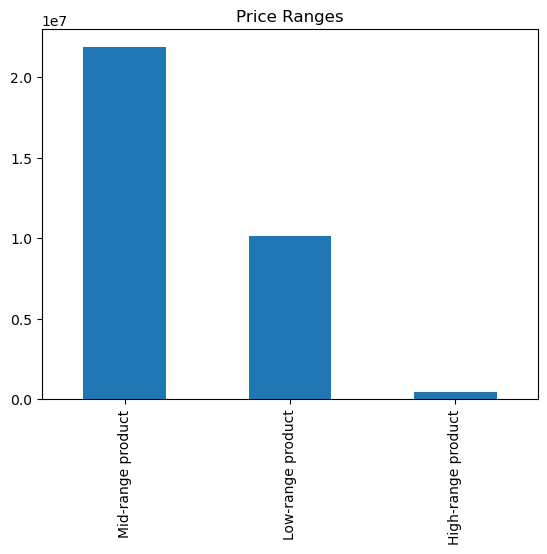

In [77]:
# Visualizing the price ranges
Income_groups_bar = df['price_range_loc'].value_counts().plot.bar()
plt.title('Price Ranges')
plt.show()

In [97]:
# Saving the visualization
Income_groups_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_ranges.png'),bbox_inches='tight')

In [78]:
# Checking Values count for "orders_day_of_week"
df['orders_day_of_week'].value_counts (dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [79]:
# Creating a new If-Statement with For-Loops
result = []

for value in df["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [80]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Reg

In [81]:
df['busiest_day'] = result

In [82]:
df['busiest_day'].value_counts(dropna=False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

In [83]:
df

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.000000,both,Mid-range product,Regularly busy
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.000000,both,Mid-range product,Regularly busy
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.000000,both,Mid-range product,Regularly busy
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.000000,both,Mid-range product,Least busy
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.000000,both,Mid-range product,Least busy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1320836,202557,17,2,15,1.0,43553,2,1,Orange Energy Shots,64,7,3.699219,both,Low-range product,Regularly busy
32404855,31526,202557,18,5,11,3.0,43553,2,1,Orange Energy Shots,64,7,3.699219,both,Low-range product,Regularly busy
32404856,758936,203436,1,2,7,NaN,42338,4,0,"Zucchini Chips, Pesto",50,19,6.898438,both,Mid-range product,Regularly busy
32404857,2745165,203436,2,3,5,15.0,42338,16,1,"Zucchini Chips, Pesto",50,19,6.898438,both,Mid-range product,Regularly busy


In [84]:
# Renaming column
df = df.rename(columns={'price_range_loc': 'price_label'})

In [85]:
df

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_label,busiest_day
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.000000,both,Mid-range product,Regularly busy
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.000000,both,Mid-range product,Regularly busy
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.000000,both,Mid-range product,Regularly busy
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.000000,both,Mid-range product,Least busy
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.000000,both,Mid-range product,Least busy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1320836,202557,17,2,15,1.0,43553,2,1,Orange Energy Shots,64,7,3.699219,both,Low-range product,Regularly busy
32404855,31526,202557,18,5,11,3.0,43553,2,1,Orange Energy Shots,64,7,3.699219,both,Low-range product,Regularly busy
32404856,758936,203436,1,2,7,NaN,42338,4,0,"Zucchini Chips, Pesto",50,19,6.898438,both,Mid-range product,Regularly busy
32404857,2745165,203436,2,3,5,15.0,42338,16,1,"Zucchini Chips, Pesto",50,19,6.898438,both,Mid-range product,Regularly busy


# Exercise: 4.7 - Deriving New Variables

### Step 1: If you haven’t done so already, complete the instructions in the Exercise for creating the “price_label” and “busiest_day” columns.

#### Completed

### Step 2: Suppose your clients have changed their minds about the labels you created in your “busiest_day” column. Now, they want “Busiest day” to become “Busiest days” (plural). This label should correspond with the two busiest days of the week as opposed to the single busiest day. At the same time, they’d also like to know the two slowest days. Create a new column for this using a suitable method.

In [86]:
# Creating a new If-Statement with For-Loops, with requirements from Step2:
result_new = []

for value in df["orders_day_of_week"]:
  if value == 0 or value == 1:
    result_new.append("Busiest days")
  elif value == 4 or value == 3:
    result_new.append("Slowest days")
  else:
    result_new.append("Regularly busy")

In [87]:
# Adding the new result to my dataframe in a new column
df['Busiest_Days'] = result_new

In [88]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_label,busiest_day,Busiest_Days
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days


### Step 3: Check the values of this new column for accuracy. Note any observations in markdown format.

In [89]:
# Checking the values in the New Column (Busiest_Days):
df['Busiest_Days'].value_counts(dropna = False)

Regularly busy    12916111
Busiest days      11864412
Slowest days       7624336
Name: Busiest_Days, dtype: int64

#### When compared to the values from "orders_day_of_week" - everything is summed correctly

### Step 4: When too many users make Instacart orders at the same time, the app freezes. The senior technical officer at Instacart wants you to identify the busiest hours of the day. Rather than by hour, they want periods of time labeled “Most orders,” “Average orders,” and “Fewest orders.” Create a new column containing these labels called “busiest_period_of_day.”

In [90]:
# Checking Values count for "order_time_of_day":
df['order_time_of_day'].value_counts (dropna = False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_time_of_day, dtype: int64

In [91]:
# Since the client wants the orders during the time of day divided into “Most orders,” “Average orders,” and “Fewest orders.”
# We need to divide the 24H day into 3 parts of 8 hours,
# Most Orders - (10,11,14,15,13,12,16,9); Average Orders - (17,8,18,19,20,7,21,22); Fewest Orders - (23,6,0,1,5,2,4,3)
# Creating an If-Statement with For-Loops, with requirements from above:
result_time_of_day = []

for value in df["order_time_of_day"]:
  if value in[10,11,14,15,13,12,16,9]:
    result_time_of_day.append("Most Orders")
  elif value in[23,6,0,1,5,2,4,3]:
    result_time_of_day.append("Fewest Orders")
  else:
    result_time_of_day.append("Average Orders")

In [92]:
# Adding the new result to my dataframe as "busiest_period_of_day"
df['busiest_period_of_day'] = result_time_of_day

In [93]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_label,busiest_day,Busiest_Days,busiest_period_of_day
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average Orders
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average Orders
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most Orders
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average Orders
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most Orders


### Step 5: Print the frequency for this new column.

In [94]:
# Checking the values in the New Column (busiest_period_of_day):
df['busiest_period_of_day'].value_counts(dropna = False)

Most Orders       21118071
Average Orders     9997651
Fewest Orders      1289137
Name: busiest_period_of_day, dtype: int64

#### The frequency matches my previous findings

In [95]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_4.7_updated.pkl'))